In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import json

In [41]:
pandasDf = pd.read_csv('time_taken.csv')
pandasDf

,architecture,time_taken
0,LeNet5,834.0000
1,AlexNet,971.7000
2,MiniVGGNet,969.7961
3,ZFNet,1083.5700
4,ResNet18,1202.2800


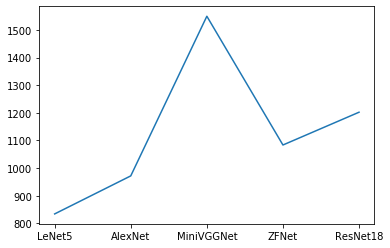

In [25]:
plt.plot(pandasDf['architecture'], pandasDf['time_taken'])

In [12]:
pandasDf['test_accuracy'] = pandasDf['test_accuracy'] + .25

In [13]:
pandasDf = pandasDf[pandasDf['architecture'] != 'ResNet18']

<Figure size 720x720 with 0 Axes>

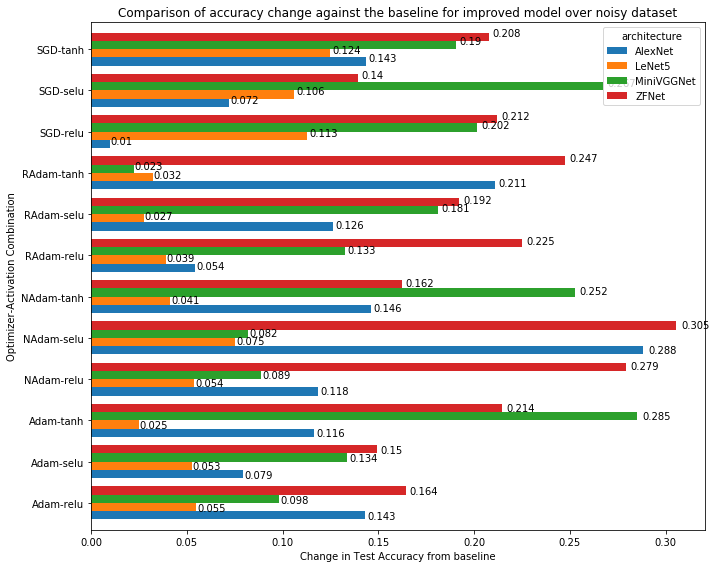

In [40]:
pandasDf['opt_act'] = pandasDf['optimizer'] + '-' + pandasDf['activation']

plt.figure(figsize=(10, 10))
pivot_view = pd.pivot_table(pandasDf, index='opt_act', columns='architecture', values='difference')

ax = pivot_view.plot(kind='barh', figsize=(10, 8), width=.8)
#\ax.legend(loc='best')
ax.set_ylabel('Optimizer-Activation Combination')
ax.set_xlabel('Change in Test Accuracy from baseline')
ax.set_title('Comparison of accuracy change against the baseline for improved model over noisy dataset')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

In [27]:
pandasDf

,architecture,time_taken
0,LeNet5,834.0000
1,AlexNet,971.7000
2,MiniVGGNet,1549.7961
3,ZFNet,1083.5700
4,ResNet18,1202.2800


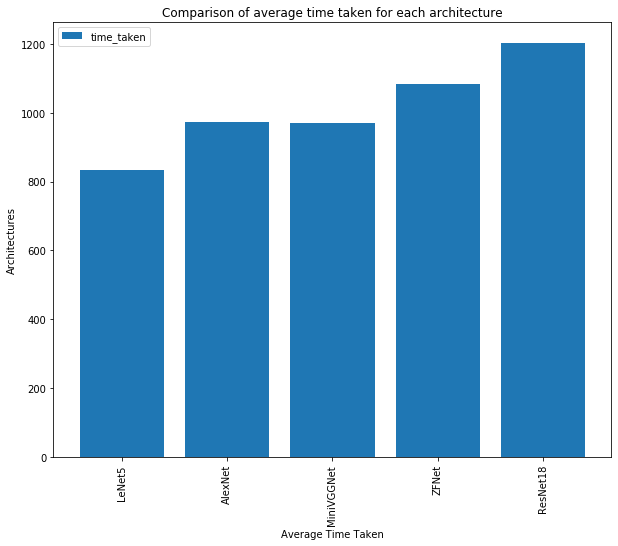

In [42]:
ax = pandasDf.plot('architecture', 'time_taken', kind='bar', figsize=(10, 8), width=.8)
ax.set_ylabel('Architectures')
ax.set_xlabel('Average Time Taken')
ax.set_title('Comparison of average time taken for each architecture')
plt.show()

In [ ]:
pandasDf['opt_act'] = pandasDf['optimizer'] + '-' + pandasDf['activation']

plt.figure(figsize=(10, 10))
pivot_view = pd.pivot_table(pandasDf, index='opt_act', columns='architecture', values='Accuracy_Change')

ax = pivot_view.plot(kind='barh', figsize=(10, 8), width=.8)
#\ax.legend(loc='best')
ax.set_ylabel('Optimizer-Activation Combination')
ax.set_xlabel('Change in Test Accuracy')
ax.set_title('Comparison of accuracy against the baseline for improved model over noisy dataset')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))